### assumption of the dataset: a list of questions from quora website are taken as sample, and then they assigned one unique id, now they are randomly paired together and inserted in the dataframe we are going to use.a 

In [2]:
import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

data = pd.read_csv(r'..\1. data_gathering\data\train.csv\train.csv')
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
data.shape

(404290, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## handling missing rows

In [5]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
data[data['question1'].isnull() | data['question2'].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [7]:
data = data[data['question1'].notnull() & data['question2'].notnull()]

In [8]:
data.shape

(404287, 6)

## handling duplicated rows

### one problem: if questions in question1 and question2 cols are swaped together they won't be identified.

In [9]:
df = pd.DataFrame({'col1':[1,2,3, 3], 'col2':[2,1,4, 3]})
df

,col1,col2
0,1,2
1,2,1
2,3,4
3,3,3


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.iloc[:, :1]

,col1
0,1
1,2
2,3
3,3


### soln

In [12]:
import warnings
warnings.filterwarnings('always')

In [13]:
df['col3'] = False

In [14]:
def find_duplicates():
    for index1, row1 in df.iterrows():
        for index2, row2 in df.iterrows():
            if row1['col1']!=row1['col2']:
                if row1['col1']==row2['col2']:
                    if row1['col2']==row2['col1']:
                        df['col3'][index1]=True

In [15]:
find_duplicates()
df

C:\Users\sarve\AppData\Local\Temp\ipykernel_22456\1883825537.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['col3'][index1]=True
C:\Users\sarve\AppData\Local\Temp\ipykernel_22456\1883825537.py:7: SettingWithCopyWarning: 
A value is t

,col1,col2,col3
0,1,2,True
1,2,1,True
2,3,4,False
3,3,3,False


### handling simple duplicate rows

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data[['qid1', 'qid2']].duplicated().sum()

np.int64(0)

In [18]:
data[data['qid1'] == data['qid2']]

,id,qid1,qid2,question1,question2,is_duplicate


## checking category balance in target col

In [19]:
data['is_duplicate'].value_counts()

is_duplicate
0    255024
1    149263
Name: count, dtype: int64

In [20]:
(data['is_duplicate'].value_counts()/data['is_duplicate'].count())*100

is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64

<Axes: xlabel='is_duplicate'>

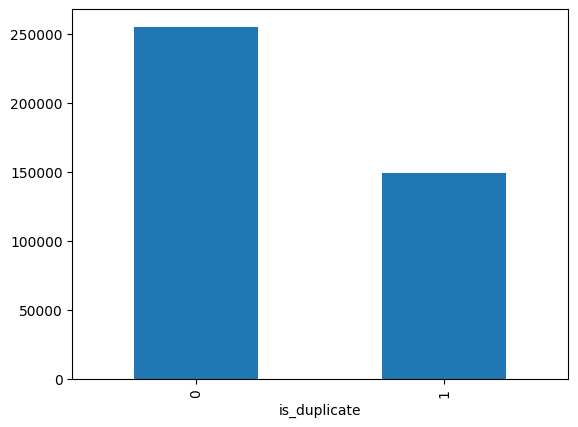

In [21]:
data['is_duplicate'].value_counts().plot(kind='bar')

## Q: analysing qids of the questions, if they are unique with uniue questions or duplicated in cols question1 and question2?

In [22]:
data['qid1'].value_counts()

qid1
8461      50
14110     48
25984     47
20628     47
1749      47
          ..
537924     1
537926     1
537928     1
537930     1
537932     1
Name: count, Length: 290652, dtype: int64

In [23]:
data[data['qid1'] == 8461].sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
396961,396961,8461,145,How do I improve my English speaking?,How I can speak English fluently?,1
366124,366124,8461,169735,How do I improve my English speaking?,What is best way to learn English speaking?,1
371953,371953,8461,28559,How do I improve my English speaking?,How I can speak English with fluency?,1
11300,11300,8461,10859,How do I improve my English speaking?,How can I specifically improve my English?,1
184945,184945,8461,23355,How do I improve my English speaking?,How do I talk English fluently?,1
255781,255781,8461,65693,How do I improve my English speaking?,How can I improve my English Language?,1
161621,161621,8461,22064,How do I improve my English speaking?,What should I do to improve my spoken English?,1
116080,116080,8461,2439,How do I improve my English speaking?,How can I improve my English pronunciation?,1
31918,31918,8461,21693,How do I improve my English speaking?,How could I improve my English?,1
205985,205985,8461,142825,How do I improve my English speaking?,How can I increase my English fluency?,1


In [24]:
data[data['qid2'] == 8461]

,id,qid1,qid2,question1,question2,is_duplicate
374363,374363,9006,8461,How do I improve my pronunciation of English?,How do I improve my English speaking?,1


In [25]:
data[data['question1'] == data['question2']]

,id,qid1,qid2,question1,question2,is_duplicate


In [26]:
# ANS: this mean in cols q1 and q2 no questions pairs are exact same, which infers that all the qids represent unique questions, although sementically they could be duplicate to other unique ided questions.

## my nomeclature:
### `repeated question` means: word by word duplicate ie. syntatically
### `duplicate question` means: meaning of 2 questions is same ie. semantically

## checking dist. of `repeating` unique questions, becoz if a question is repeating 100 times that means, this questions was asked 100 different ways.

In [27]:
all_questions = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
all_questions

0              1
1              3
2              5
3              7
4              9
           ...  
808569    379845
808570    155606
808571    537929
808572    537931
808573    537933
Length: 808574, dtype: int64

In [28]:
all_questions.nunique()

537929

In [29]:
print('no of repeated questions in both questions cols', all_questions.nunique())
print('no of repeated questions in both questions cols with >1 repetition', pd.Series(all_questions.value_counts()[all_questions.value_counts()>1]).shape[0])

no of repeated questions in both questions cols 537929
no of repeated questions in both questions cols with >1 repetition 111778


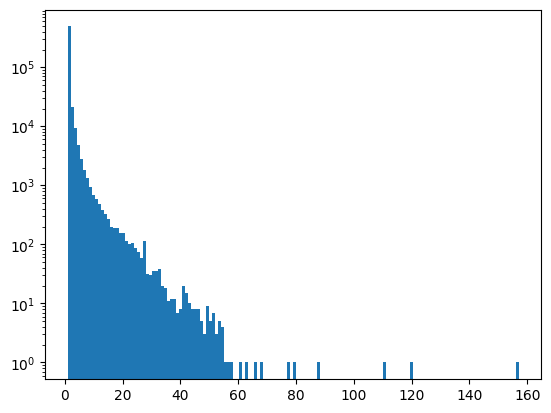

In [30]:
plt.hist(all_questions.value_counts(), bins=150)
plt.yscale('log')
plt.show()

In [31]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### data cleaning

In [ ]:
def preprocess(q):
    

In [32]:
data.to_csv(r'cleaned_data.csv', index=False)